In [131]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("whitegrid")

In [132]:
#Read data
bridge = pd.read_csv('./CoverMyMeds_data/bridge.csv')
dim_claims = pd.read_csv('./CoverMyMeds_data/dim_claims.csv')
dim_date = pd.read_csv('./CoverMyMeds_data/dim_date.csv')
dim_pa = pd.read_csv('./CoverMyMeds_data/dim_pa.csv')

In [133]:
## merge dim_date with dim_claims
date_merged = bridge.merge(dim_claims, on=['dim_claim_id'], how='outer').merge(dim_date, on=['dim_date_id'], how='outer')

## remove rows on dates without claim 
date_merged = date_merged[date_merged.dim_claim_id.notnull()]

## further merge with dim_pa for those with pa requests 
all_merged = dim_pa.merge(date_merged[date_merged.dim_pa_id.notnull()], on=['dim_pa_id'], how='outer')

In [136]:
all_merged.describe()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,reject_code,pharmacy_claim_approved,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
count,555951.000000,555951.000000,555951.00000,555951.000000,555951.000000,5.559510e+05,555951.000000,555951.000000,555951.000000,555951.0,555951.000000,555951.000000,555951.000000,555951.000000,555951.000000,555951.000000,555951.000000
mean,277976.000000,0.799819,0.50076,0.200802,0.734451,6.688882e+05,575.838801,484588.556518,72.887159,0.0,2018.084655,6.424998,15.732953,4.024731,0.878072,0.864207,0.008245
std,160489.374091,0.400136,0.50000,0.400601,0.441625,3.855600e+05,311.694350,185661.042030,2.651888,0.0,0.806882,3.455819,8.752702,1.672094,0.327203,0.342568,0.090429
min,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000e+00,1.000000,417380.000000,70.000000,0.0,2017.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,138988.500000,1.000000,0.00000,0.000000,0.000000,3.352685e+05,318.000000,417614.000000,70.000000,0.0,2017.000000,3.000000,8.000000,3.000000,1.000000,1.000000,0.000000
50%,277976.000000,1.000000,1.00000,0.000000,1.000000,6.696980e+05,591.000000,417614.000000,75.000000,0.0,2018.000000,6.000000,16.000000,4.000000,1.000000,1.000000,0.000000
75%,416963.500000,1.000000,1.00000,0.000000,1.000000,1.002914e+06,842.000000,417740.000000,75.000000,0.0,2019.000000,9.000000,23.000000,5.000000,1.000000,1.000000,0.000000
max,555951.000000,1.000000,1.00000,1.000000,1.000000,1.335574e+06,1095.000000,999001.000000,76.000000,0.0,2019.000000,12.000000,31.000000,7.000000,1.000000,1.000000,1.000000


In [135]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
X = all_merged[['correct_diagnosis', 'tried_and_failed','contraindication', 'bin', 'drug', 'reject_code']].copy()
X = pd.get_dummies(X, prefix=['bin', 'drug', 'reject_code'], columns=['bin', 'drug', 'reject_code'])
y = all_merged['pa_approved'].copy()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

In [138]:
X_train.tail()

,correct_diagnosis,tried_and_failed,contraindication,bin_417380.0,bin_417614.0,bin_417740.0,bin_999001.0,drug_A,drug_B,drug_C,reject_code_70.0,reject_code_75.0,reject_code_76.0
416958,1,0,1,0,0,1,0,0,0,1,0,1,0
416959,1,1,0,0,0,0,1,0,0,1,0,0,1
416960,1,0,0,1,0,0,0,0,0,1,1,0,0
416961,0,0,1,1,0,0,0,0,0,1,1,0,0
416962,1,0,1,1,0,0,0,0,0,1,1,0,0


# model building and evaluation

In [ ]:
# use out of time split 
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 3)

In [79]:
## Use these to compute your accuracy, precision, and recall

## Accuracy
from sklearn.metrics import accuracy_score
## Precision
from sklearn.metrics import precision_score
## Recall
from sklearn.metrics import recall_score

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [166]:
# use out of time split 
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 4)

In [169]:


keep_cols = ['correct_diagnosis', 'tried_and_failed','contraindication', 'bin_417380.0', 'bin_417614.0', 'bin_417740.0', 'bin_999001.0', 'drug_A', 'drug_B', 'drug_C', 'reject_code_70.0', 'reject_code_75.0', 'reject_code_76.0']


X_train_copy = X_train[keep_cols].copy()

# n is the maximum max_depth
n = 20

accs = np.zeros((4,n))
precs = np.zeros((4,n))
recs = np.zeros((4,n))

for j in range(1,n+1):
    print(j)
    rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=j)
    
    i = 0
    for train_index,test_index in tscv.split(X_train_copy):
        X_train_train, X_train_test = X_train_copy.iloc[train_index],X_train_copy.iloc[test_index]
        y_train_train, y_train_test = y_train.iloc[train_index],y_train.iloc[test_index]

        rf_clone = clone(rf_clf)
        rf_clone.fit(X_train_train,y_train_train)
        
        y_predict = rf_clone.predict(X_train_test)
        accs[i,j-1] = accuracy_score(y_train_test,y_predict)
        precs[i,j-1] = precision_score(y_train_test,y_predict)
        recs[i,j-1] = recall_score(y_train_test,y_predict)
        i = i + 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


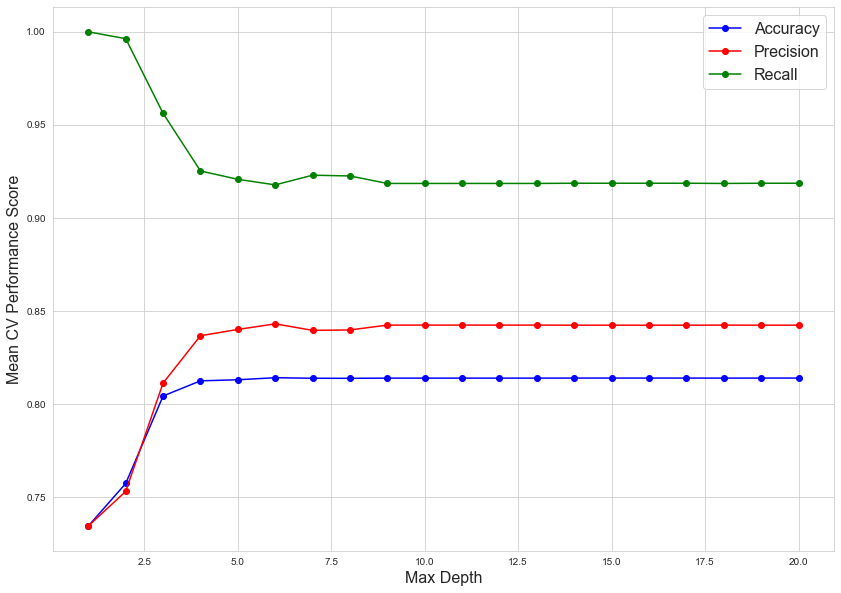

In [173]:
## Plot that mean cv measure against max_depth


plt.figure(figsize=(14,10))

plt.plot(range(1,n+1), np.mean(accs,axis=0),'b-o', label="Accuracy")
plt.plot(range(1,n+1), np.mean(precs,axis=0),'r-o', label="Precision")
plt.plot(range(1,n+1), np.mean(recs,axis=0),'g-o', label="Recall")

plt.ylabel("Mean CV Performance Score",fontsize=16)
plt.xlabel("Max Depth",fontsize=16)

plt.legend(fontsize=16)

plt.show()

In [174]:
# fit the random forest model with max_depth = 5

rf_clf = RandomForestClassifier(n_estimators = 500, max_depth=5)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

accuracy: 0.8128471522721386


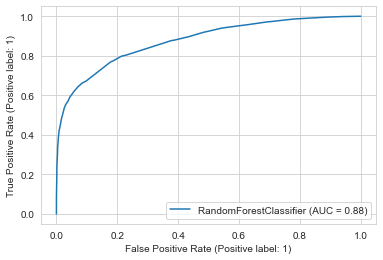

In [151]:
# print('LR ROC AUC:', roc_auc_score(y_test, rf_clf.predict_proba[:, 1]))
print('accuracy:', accuracy_score(y_test, rf_clf.predict(X_test)))
plot_roc_curve(rf_clf, X_test, y_test) 
plt.show()

## Use SHAP value for model interpretation  

In [177]:
import shap
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)



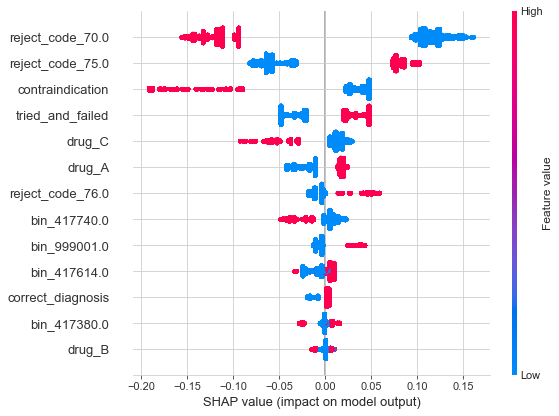

In [122]:
shap.summary_plot(shap_values[1], X_test)

In [219]:
# SHAP force plot provides insights for the most significant feature, here we take sample #95 from test set. 
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][95,:], X_test.iloc[95,:])

##  Visualize decision tree from random forest model 

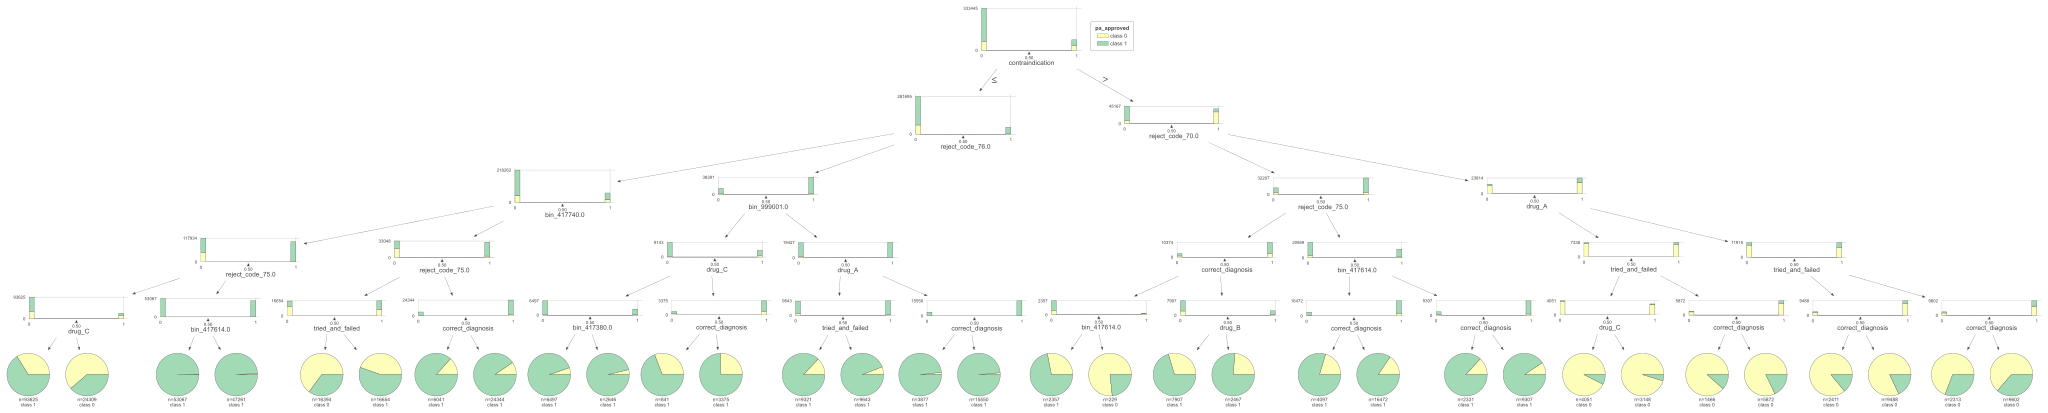

In [164]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(forest_clf.estimators_[0], X_train, y_train,
                target_name="pa_approved", feature_names=keep_cols)
viz

In [165]:
viz.save('rf_1.svg')

In [166]:
from sklearn.inspection import permutation_importance

In [167]:
result = permutation_importance(
    forest_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

In [168]:
forest_importances = pd.Series(result.importances_mean, index=keep_cols)

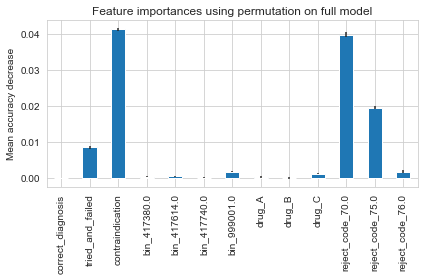

In [169]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

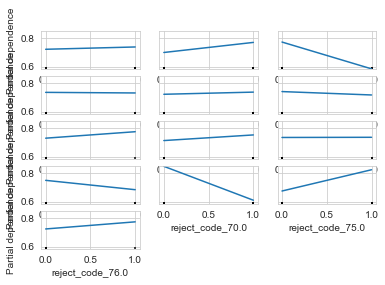

In [172]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(forest_clf, X_train, keep_cols) 

## Calculate permutation importance

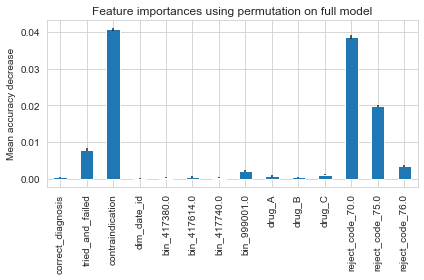

In [189]:
# calculate permutation imortance
result = permutation_importance(
    forest_clf, X_date_test, y_date_test, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=['correct_diagnosis', 'tried_and_failed','contraindication', 'dim_date_id','bin_417380.0', 'bin_417614.0', 'bin_417740.0', 'bin_999001.0', 'drug_A', 'drug_B', 'drug_C', 'reject_code_70.0', 'reject_code_75.0', 'reject_code_76.0'])
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()